###############################################################
# PART1:    DETERMINE PROBABILITIES                           #
###############################################################

# INDEX:

-**Import:**

-**Read Data:**
   - **Import coffee-bar dataset**
   - **Data overview**
   
-**Meta data:**
   - **List of foods**
   - **List of drinks**
   - **Number unique customers**
   - *(Number of daily timestamps)*
   - *(Proportion of customer buying food by hours)*
   
-**Plot:**
   - **Global food & drinks sold over the  years**
   - **Total food items sold over the 5 years**
   - **Total drink items sold over the 5 years**
   
-**Probability:**
   - **Average Number of customers for each food/drink at any given time **

-**Export:**

-**Returning customers:**
   - **Number of returning customers & History**
   - **Time appearance & Probability of returning customer at given time**
   - **Returning consumption & Correlation between returning and one-timers**


#  IMPORTS #



In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os  # Access to path

# READ DATA #

In [2]:
# Reading customer data csv file
try:
    datapath = os.path.abspath("../Data/Coffeebar_2013-2017.csv")
    df_customers = pd.read_csv(datapath, sep=";")
except:
    print("DATA PATH INVALID")

# Convert TIME to date format
df_customers['TIME'] = pd.to_datetime(df_customers['TIME'])

# Quick Data Frame overview :
print("The dataset contains {} rows and {} columns.".format(
    df_customers.shape[0],df_customers.shape[1]))

# print the head of the dataset
df_customers.head()

The dataset contains 312075 rows and 4 columns.


TIME     CUSTOMER      DRINKS FOOD
0 2013-01-01 08:00:00  CID83766474  frappucino  NaN
1 2013-01-01 08:05:00  CID85351810        soda  NaN
2 2013-01-01 08:10:00  CID45614777      coffee  NaN
3 2013-01-01 08:15:00  CID47491738         tea  NaN
4 2013-01-01 08:20:00  CID16010646  frappucino  NaN

# META DATA

In [3]:
# List of drinks
temp = "List of drinks:"
for element in df_customers['DRINKS'].unique():
    temp = "%s %s" % (temp, element )
print(temp)

# List of foods
temp = "List of foods:"
for element in df_customers['FOOD'].unique():
    if pd.isnull(element) == False: 
        temp = "%s %s" % (temp, element )
print(temp)

# Number of different customers
print("Number of different customers: %s" % len(df_customers[
    'CUSTOMER'].unique()))
# For more detailled informations on the clients composition :
# see the part "RETURNING CUSTOMERS" bellow.

List of drinks: frappucino soda coffee tea water milkshake
List of foods: sandwich pie muffin cookie
Number of different customers: 247988


In [4]:
# Number of daily time stamps
print("Number of daily timestamps : %s" 
      % len(df_customers.groupby(df_customers[
          'TIME'].dt.strftime("%H:%M"))['TIME'].count()))

# Proportion of customers taking food 
temp = df_customers.groupby(df_customers['TIME'].dt.strftime("%H"))[
    'FOOD'].count()/df_customers.groupby(df_customers[
    'TIME'].dt.strftime("%H"))['DRINKS'].count()
print("Number of food sold by hours : %s"  % temp)

Number of daily timestamps : 171
Number of food sold by hours : TIME
08    0.000000
09    0.000000
10    0.000000
11    1.000000
12    1.000000
13    0.402922
14    0.396822
15    0.400950
16    0.399781
17    0.400256
dtype: float64


** Note : **

In the data frame the data is composed of 171 daily timestamps:
   - One every 5 minutes for the period 8h-10h (33 timestamps or 11/hour)
   - One every 2 minutes for the period 11h-12h (58 timestamps or 29/hour)
   - One every 4 minutes for the period 13h-17h (95 timestamps or 19/hour)
   
The data frame is composed of 5 years of 365 days whith 171 timestamps (312075 rows).
The food consumption have the following rules:
   - 0%   customers buy food for the period 8h-10h
   - 100% customers buy food for the period 11h-12h
   - ~40% of the customer buy food for the period 13h-17h

   

# PLOTS 

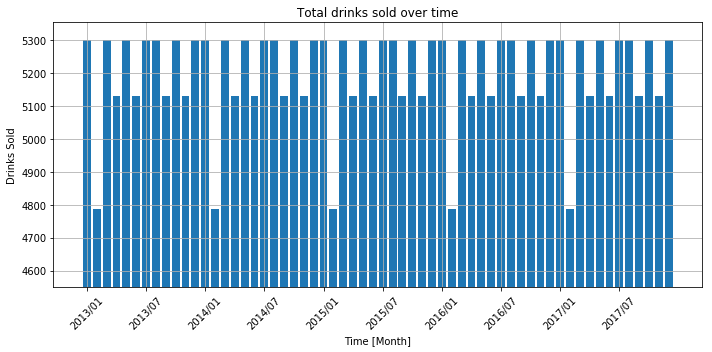

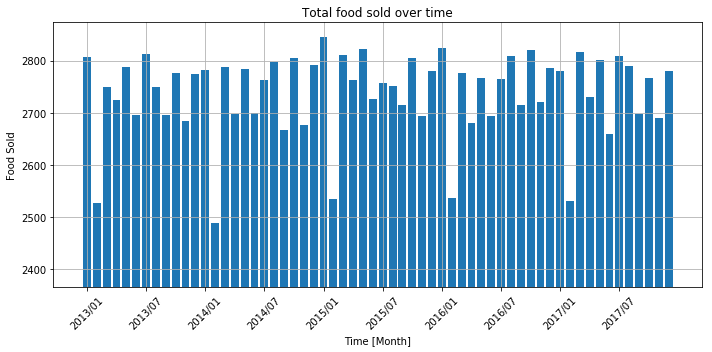

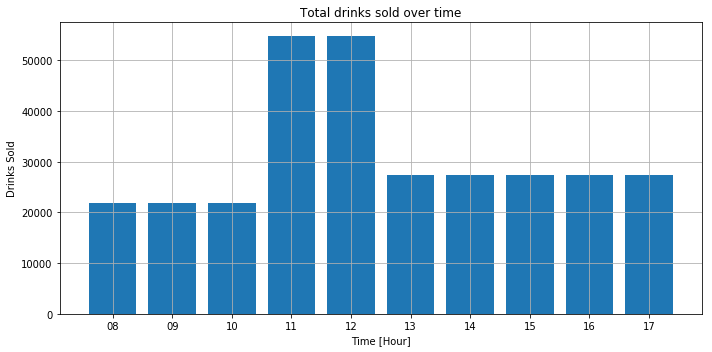

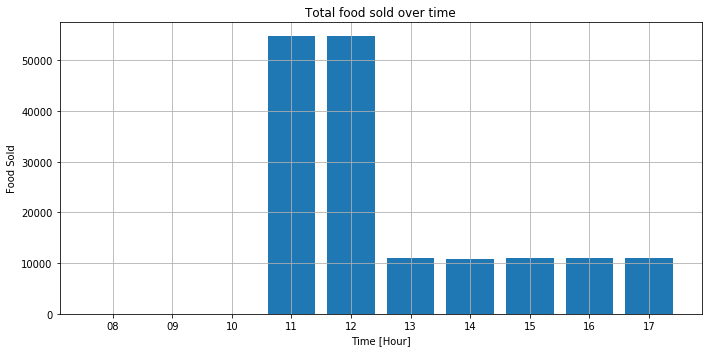

In [5]:
# MONTHLY DATA BARPLOT

# Total drinks sold over time
subdf_consumptionD = df_customers.groupby(df_customers[
    'TIME'].dt.strftime("%Y/%m"))['DRINKS'].count()

# Total food sold over time
subdf_consumptionF = df_customers.groupby(df_customers[
    'TIME'].dt.strftime("%Y/%m"))['FOOD'].count()

# Create a custom xlabel
custom_axe = [(a, b) for a, b in enumerate(subdf_consumptionD.index) if a % 6 == 0]
pos = [a[0] for a in custom_axe]
lab = [a[1] for a in custom_axe]

# Plot drinks over time
plt.figure(figsize=(10, 5))
plt.bar(subdf_consumptionD.index, subdf_consumptionD)
plt.xlabel('Time [Month]')
plt.ylabel('Drinks Sold')
plt.xticks(pos, lab, rotation=45)
plt.ylim(0.95*subdf_consumptionD.min(), 1.01*subdf_consumptionD.max())
plt.title('Total drinks sold over time')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.abspath( '../Plots/Drinks_Sold_Monthly.png' ))

# Plot food over time
plt.figure(figsize=(10, 5))
plt.bar(subdf_consumptionF.index, subdf_consumptionF)
plt.xlabel('Time [Month]')
plt.ylabel('Food Sold')
plt.xticks(pos, lab, rotation=45)
plt.ylim(0.95*subdf_consumptionF.min(), 1.01*subdf_consumptionF.max())
plt.title('Total food sold over time')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.abspath( '../Plots/Food_Sold_Monthly.png' ))

# HOURLY DATA BARPLOT

# Total drinks sold over time
subdf_consumptionD = df_customers.groupby(df_customers[
    'TIME'].dt.strftime("%H"))['DRINKS'].count()

# Total food sold over time
subdf_consumptionF = df_customers.groupby(df_customers[
    'TIME'].dt.strftime("%H"))['FOOD'].count()

# Plot drinks over time
plt.figure(figsize=(10, 5))
plt.bar(subdf_consumptionD.index, subdf_consumptionD)
plt.xlabel('Time [Hour]')
plt.ylabel('Drinks Sold')
plt.title('Total drinks sold over time')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.abspath( '../Plots/Drinks_Sold_Hourly.png' ))

# Plot food over time
plt.figure(figsize=(10, 5))
plt.bar(subdf_consumptionF.index, subdf_consumptionF)
plt.xlabel('Time [Hour]')
plt.ylabel('Food Sold')
plt.title('Total food sold over time')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.abspath( '../Plots/Hourly_Sold_Hourly.png' ))

# These graphs only highlight the constatations made in the previous note.
# For more intersting plot we will make

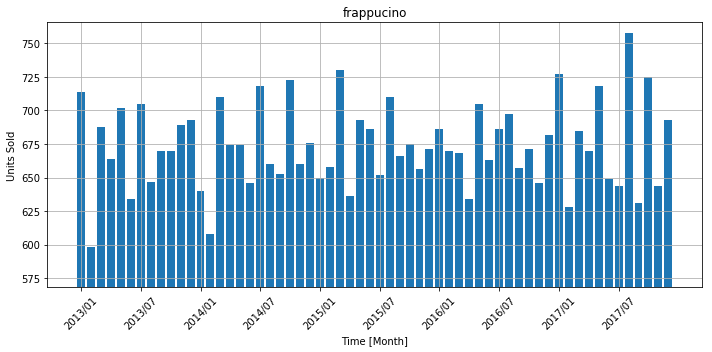

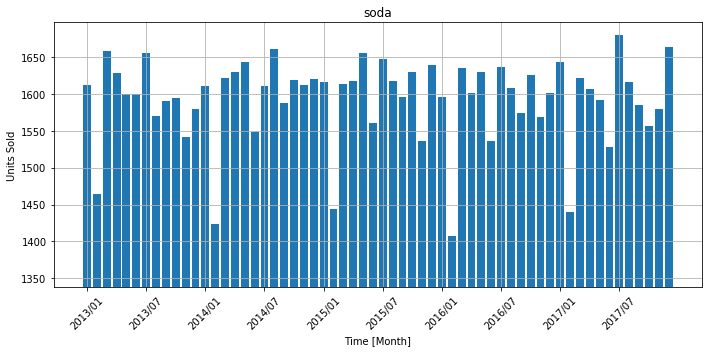

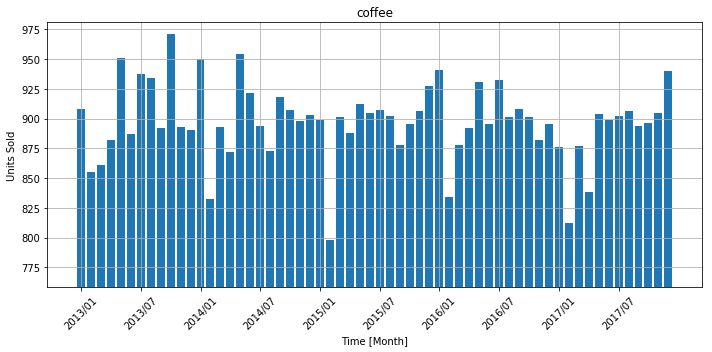

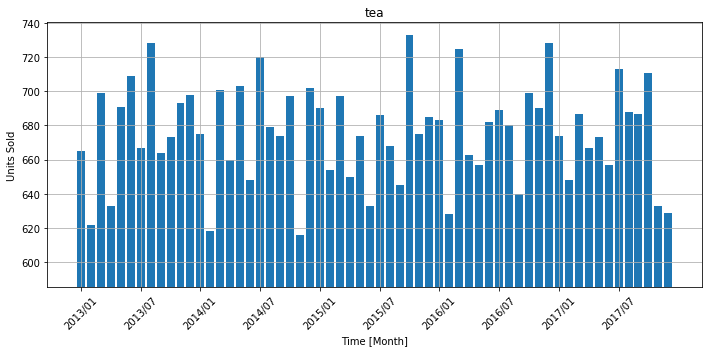

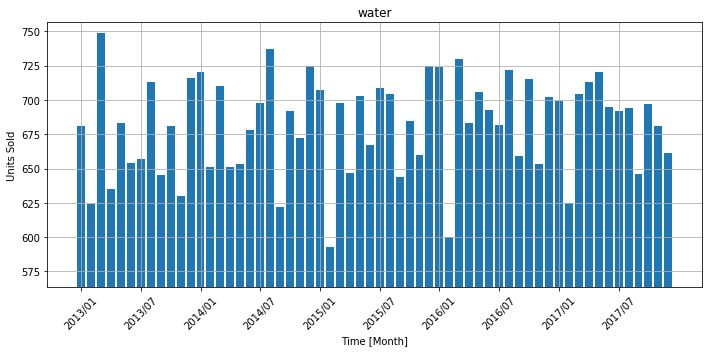

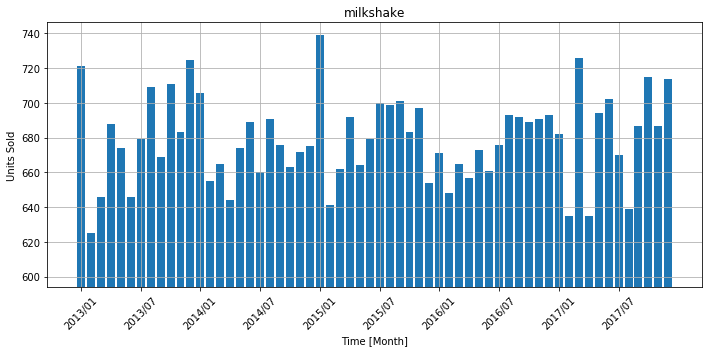

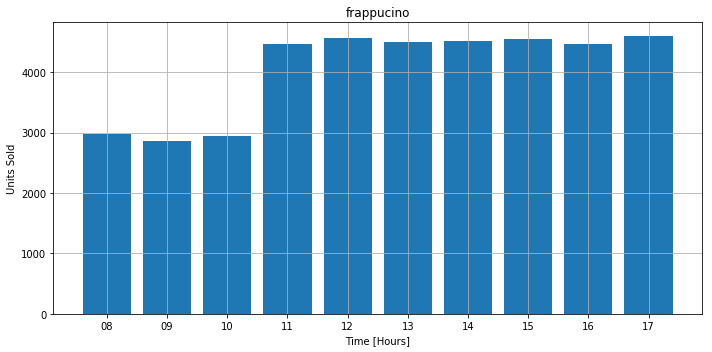

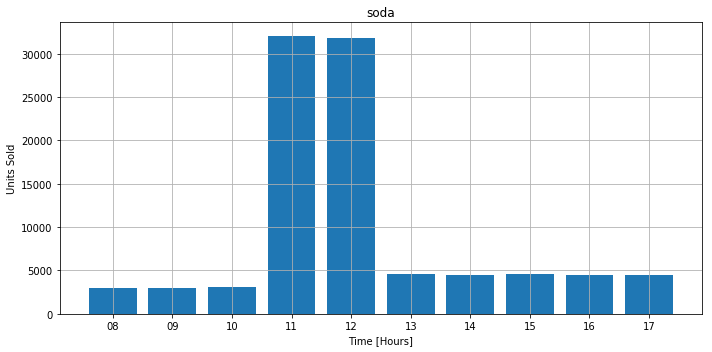

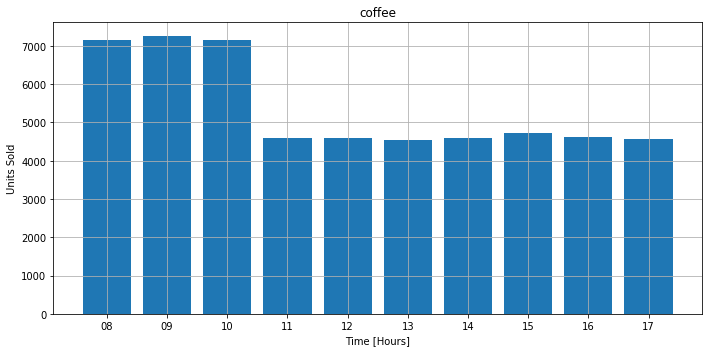

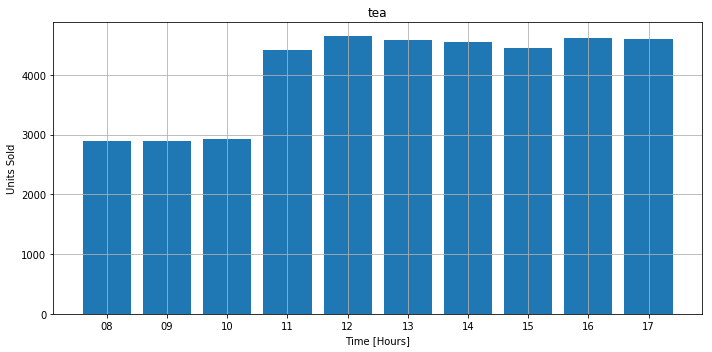

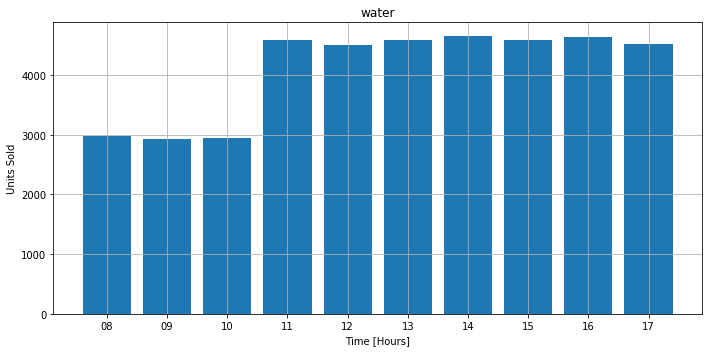

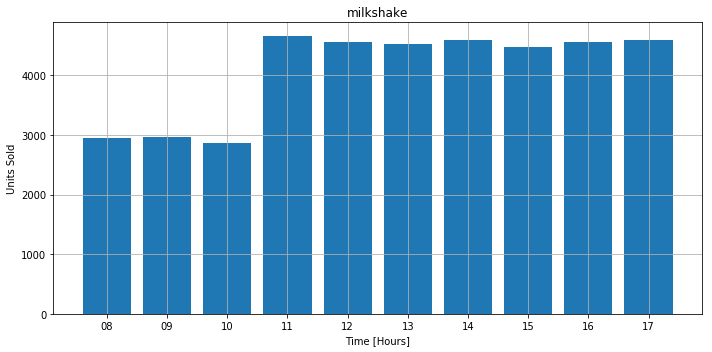

In [6]:
# MONTHLY DATA BARPLOT : DRINKS

for element in df_customers['DRINKS'].unique():
    df_customers_1D = df_customers[df_customers['DRINKS'] == element]
    # Total drinks sold over time
    subdf_monthlyconsumptionD = df_customers_1D.groupby(df_customers_1D[
        'TIME'].dt.strftime("%Y/%m"))['DRINKS'].count()
    # Create a custom xlabel
    custom_axe = [(a, b) for a, b in enumerate(
        subdf_monthlyconsumptionD.index) if a % 6 == 0]
    pos = [a[0] for a in custom_axe]
    lab = [a[1] for a in custom_axe]
    # Plot drinks over time
    plt.figure(figsize=(10, 5))
    plt.bar(subdf_monthlyconsumptionD.index, subdf_monthlyconsumptionD)
    plt.xlabel('Time [Month]')
    plt.ylabel('Units Sold')
    plt.xticks(pos, lab, rotation=45)
    plt.ylim(0.95*subdf_monthlyconsumptionD.min(), 1.01*subdf_monthlyconsumptionD.max())
    plt.title(element)
    plt.grid(True)
    plt.tight_layout()
    path = '../Plots/Drinks/%s_Sold_Monthly.png' % element
    plt.savefig(os.path.abspath( path ))
    
# Hourly DATA BARPLOT : DRINKS

for element in df_customers['DRINKS'].unique():
    df_customers_1D = df_customers[df_customers['DRINKS'] == element]
    # Total drinks sold over time
    subdf_hourlyconsumptionD = df_customers_1D.groupby(df_customers_1D[
        'TIME'].dt.strftime("%H"))['DRINKS'].count()
    # Plot drinks over time
    plt.figure(figsize=(10, 5))
    plt.bar(subdf_hourlyconsumptionD.index, subdf_hourlyconsumptionD)
    plt.xlabel('Time [Hours]')
    plt.ylabel('Units Sold')
    plt.title(element)
    plt.grid(True)
    plt.tight_layout()
    path = '../Plots/Drinks/%s_Sold_Hourly.png' % element
    plt.savefig(os.path.abspath( path ))


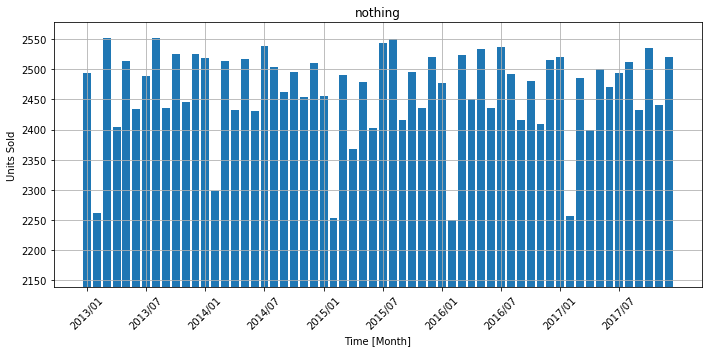

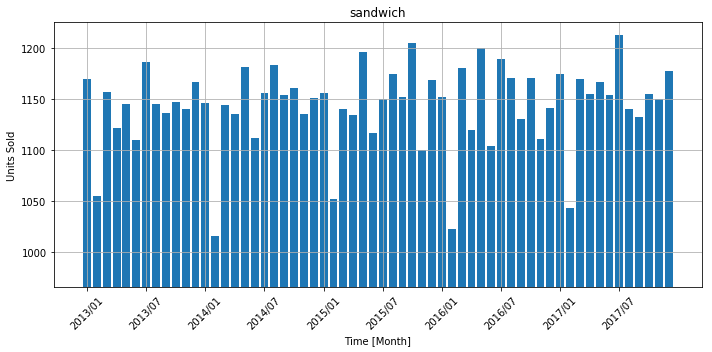

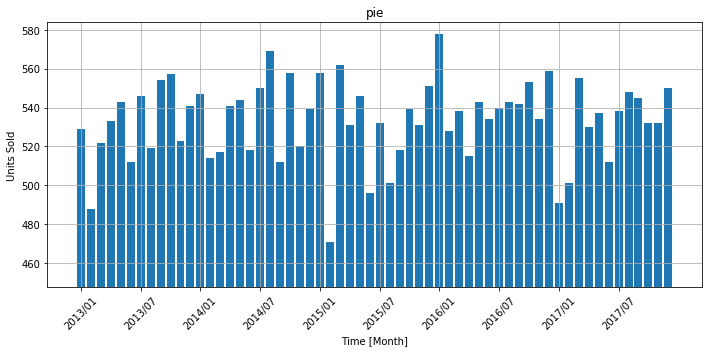

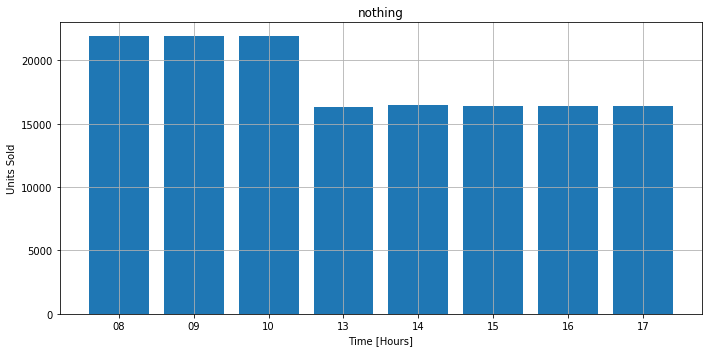

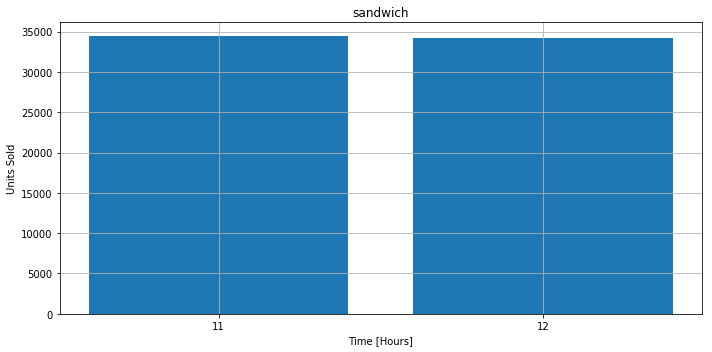

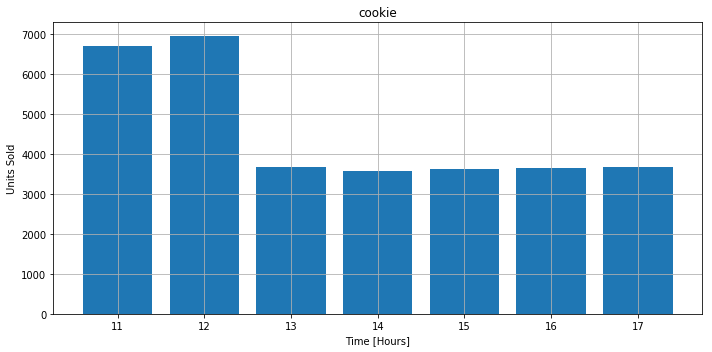

In [7]:
#Temporary replacement for NA values graphs
df_customers_bis = df_customers.copy()
df_customers_bis.fillna("nothing", inplace = True)

# MONTHLY DATA BARPLOT : FOOD
for element in df_customers_bis['FOOD'].unique():
    df_customers_1F = df_customers_bis[df_customers_bis['FOOD'] == element]
    # Total drinks sold over time
    subdf_monthlyconsumptionF = df_customers_1F.groupby(df_customers_1F[
        'TIME'].dt.strftime("%Y/%m"))['FOOD'].count()
    # Create a custom xlabel
    custom_axe = [(a, b) for a, b in enumerate(
        subdf_monthlyconsumptionF.index) if a % 6 == 0]
    pos = [a[0] for a in custom_axe]
    lab = [a[1] for a in custom_axe]
    # Plot drinks over time
    plt.figure(figsize=(10, 5))
    plt.bar(subdf_monthlyconsumptionF.index, subdf_monthlyconsumptionF)
    plt.xlabel('Time [Month]')
    plt.ylabel('Units Sold')
    plt.xticks(pos, lab, rotation=45)
    plt.ylim(0.95*subdf_monthlyconsumptionF.min(), 1.01*subdf_monthlyconsumptionF.max())
    plt.title(element)
    plt.grid(True)
    plt.tight_layout()
    path = '../Plots/Food/%s_Sold_Monthly.png' % element
    plt.savefig(os.path.abspath( path ))
    
# Hourly DATA BARPLOT : DRINKS

for element in df_customers_bis['FOOD'].unique():
    df_customers_1F = df_customers_bis[df_customers_bis['FOOD'] == element]
    # Total drinks sold over time
    subdf_hourlyconsumptionF = df_customers_1F.groupby(df_customers_1F[
        'TIME'].dt.strftime("%H"))['FOOD'].count()
    # Plot drinks over time
    plt.figure(figsize=(10, 5))
    plt.bar(subdf_hourlyconsumptionF.index, subdf_hourlyconsumptionF)
    plt.xlabel('Time [Hours]')
    plt.ylabel('Units Sold')
    plt.title(element)
    plt.grid(True)
    plt.tight_layout()
    path = '../Plots/Food/%s_Sold_Hourly.png' % element
    plt.savefig(os.path.abspath( path ))

** Note : **
We can observe that for both food and drink the consumption rates can be segmented in three periods:
- [08h;10h]
- [11h;12h]
- [13h;17h]

Accross these 3 periods the rates are roughly stables.

# PROBABILITY
**Note on the creation of df_probabilities:** Since it is an artificial data set the total of customers over 5 years is a constant (1825 for provided file) .
- We could not use this column or drop it later then compute the probabilities with the constant.
- OR delete the columnn after the computing.
It is not our choice here as it will not be the case in most dataset.  

In [8]:
# Up to this point :
df_customers_bis = df_customers.copy()
df_customers_bis.fillna("nothing", inplace=True)

# Number of consumers at given time
subdf_hourlyconsumers = df_customers_bis.groupby(df_customers_bis[
    'TIME'].dt.strftime("%H:%M"))['CUSTOMER'].count()

# Create a probabilities table
df_probabilities = pd.DataFrame(subdf_hourlyconsumers).copy()
df_probabilities.rename(
    index=str, columns={'CUSTOMER': 'TOTAL'}, inplace=True)

# For each drink type
for element in df_customers_bis['DRINKS'].unique():
    # Create count of hourly customers
    subdf_specificD = df_customers_bis[df_customers_bis['DRINKS'] == element]
    subdf_hourlyconsumptionSD = pd.DataFrame(subdf_specificD.groupby(
        subdf_specificD['TIME'].dt.strftime("%H:%M"))['CUSTOMER'].count())
    # Merge with probabilities table
    df_probabilities = pd.concat(
        [df_probabilities, subdf_hourlyconsumptionSD], axis=1)
    df_probabilities.rename(
        index=str, columns={'CUSTOMER': element}, inplace=True)

# For each food type
for element in df_customers_bis['FOOD'].unique():
    # Create a table if a type of food is consumed
    subdf_specificF = df_customers_bis[df_customers_bis['FOOD'] == element]
    # Create count of hourly customers
    subdf_hourlyconsumptionSF = subdf_specificF.groupby(
        subdf_specificF['TIME'].dt.strftime("%H:%M"))['CUSTOMER'].count()
    # Merge with probabilities table
    df_probabilities = pd.concat(
        [df_probabilities, subdf_hourlyconsumptionSF], axis=1)
    df_probabilities.rename(
        index=str, columns={'CUSTOMER': element}, inplace=True)

# Compute probabilities
df_probabilitiesR = df_probabilities.apply(
    lambda x: x/df_probabilities.TOTAL.values, axis=0)

# We could  drop this columns as it is a constant but here we choose to keep it
df_probabilitiesR.TOTAL = df_probabilitiesR.TOTAL 

# Replace Missing values
df_probabilitiesR.fillna(0, inplace=True)

# Print head values
df_probabilitiesR.head()

TOTAL  frappucino      soda    coffee       tea     water  milkshake  \
08:00    1.0    0.144658  0.128219  0.315616  0.126575  0.140274   0.144658   
08:05    1.0    0.127671  0.129863  0.346301  0.128767  0.126575   0.140822   
08:10    1.0    0.128767  0.134247  0.323836  0.135342  0.138630   0.139178   
08:15    1.0    0.131507  0.139726  0.323836  0.144658  0.132603   0.127671   
08:20    1.0    0.138082  0.130959  0.338082  0.134795  0.129315   0.128767   

       nothing  sandwich  pie  muffin  cookie  
08:00      1.0       0.0  0.0     0.0     0.0  
08:05      1.0       0.0  0.0     0.0     0.0  
08:10      1.0       0.0  0.0     0.0     0.0  
08:15      1.0       0.0  0.0     0.0     0.0  
08:20      1.0       0.0  0.0     0.0     0.0

# EXPORT

In [9]:
# Saving probabilities data into csv file
datapath = os.path.abspath("../Data/Coffeebar_Probabilities.csv")
df_probabilitiesR.to_csv(datapath, sep=';')

# RETURING CUSTOMERS:
   - Number of returning customers & History
   - Time appearance & Probability of returning customer at given time
   - Returning consumption & Correlation between returning and one-timers
    

In [10]:
# Number of different customers
temp = len(df_customers['CUSTOMER'].unique())
print("Number of different customers: %s" % temp)

# Sub Data Frame with only returning customers 
df_returning = df_customers[df_customers.duplicated(['CUSTOMER'], keep=False)]

# Number of returning & one-time  customers
temp = len(df_returning['CUSTOMER'].unique())
print("Number of returning customers: %s" % temp)
temp = len(df_customers[
    'CUSTOMER'].unique())-len(df_returning['CUSTOMER'].unique())
print("Number of one-time customers: %s" % temp)

# Number of occurence of a returning customer
temp = len(df_returning['CUSTOMER'])
print("Number of occurence of a returning customer: %s\n" % temp)
temp = df_returning.groupby(
    df_returning['CUSTOMER'])['TIME'].count().describe()
print('More Data on number of occurences:\n%s\n' % temp)
    
# Example of returning history  
# Select an Id
r_customer = df_returning.iloc[0]['CUSTOMER']
# Make a restriction
r_history = df_returning[df_returning['CUSTOMER'] == r_customer].head()
print("Buying history of %s:\n %s\n" % (r_customer, r_history))

Number of different customers: 247988
Number of returning customers: 1000
Number of one-time customers: 246988
Number of occurence of a returning customer: 65087

More Data on number of occurences:
count    1000.000000
mean       65.087000
std         8.168118
min        40.000000
25%        60.000000
50%        65.000000
75%        71.000000
max        88.000000
Name: TIME, dtype: float64

Buying history of CID01246657:
                      TIME     CUSTOMER  DRINKS      FOOD
5     2013-01-01 08:25:00  CID01246657  coffee       NaN
911   2013-01-06 11:40:00  CID01246657    soda  sandwich
14532 2013-03-26 17:48:00  CID01246657     tea    muffin
15473 2013-04-01 12:34:00  CID01246657    soda  sandwich
17571 2013-04-13 15:12:00  CID01246657     tea       pie



Daily proportion of returning customers over 5 years:
 count    1825.000000
mean        0.208562
std         0.030427
min         0.099415
25%         0.187135
50%         0.210526
75%         0.228070
max         0.309942
Name: TIME, dtype: float64

The ratio is almost uniform over the 5 years.
The 95% CI is : [20.7162%; 20.9962%]

Proportion of returning customers by hours:
 count    10.000000
mean      0.229958
std       0.084194
min       0.097845
25%       0.196016
50%       0.249174
75%       0.301425
max       0.304731
Name: TIME, dtype: float64

Since the spread is much bigger we will plot the result:


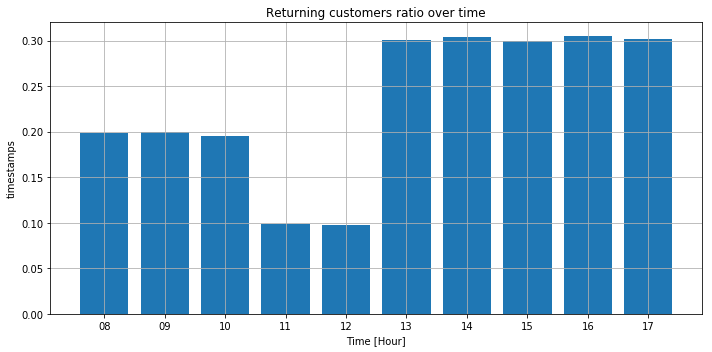

In [11]:
# Time appearance of returning customers

# Daily data
time_constraint = "%Y/%m/%d"
df_ratio_returning = df_returning.groupby(df_returning[
    'TIME'].dt.strftime(time_constraint))[
    'TIME'].count()/df_customers.groupby(df_customers[
    'TIME'].dt.strftime(time_constraint))['TIME'].count() 

""" OR: (GIVES THE SAME CONFIDENCE INTERVAL AS THE FIRST METHOD)
ratio= pd.concat([df_returning.groupby(df_returning[
    'TIME'].dt.strftime(%Y/%m/%d %H:%M))['TIME'].count(), df_customers.groupby(
    df_customers['TIME'].dt.strftime(%Y/%m/%d %H:%M))['TIME'].count()], axis=1)
ratio.fillna(0, inplace=True)
ratio_returning =test.iloc[:,0]
"""
print("Daily proportion of returning customers over 5 years:\n %s\n" 
      % df_ratio_returning.describe())
# Confidence interval for the previous sample

print("The ratio is almost uniform over the 5 years.\nThe 95% CI is : [20.7162%; 20.9962%]\n")

# By hours
time_constraint = "%H"
# Total returning customer over time
df_ratio_returning = df_returning.groupby(df_returning[
    'TIME'].dt.strftime(time_constraint))[
    'TIME'].count()/df_customers.groupby(df_customers[
    'TIME'].dt.strftime(time_constraint))['TIME'].count() 
print("Proportion of returning customers by hours:\n %s\n" 
      % df_ratio_returning.describe())
print("Since the spread is much bigger we will plot the result:")

# Plot
plt.figure(figsize=(10, 5))
plt.bar(df_ratio_returning.index, df_ratio_returning)
plt.xlabel('Time [Hour]')
plt.ylabel('timestamps')
plt.title('Returning customers ratio over time')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.abspath( '../Plots/Returning_Customers_Periods.png' ))

Data on food consumption probability of a returning customer:
count    1000.000000
mean        0.420574
std         0.061811
min         0.228070
25%         0.380039
50%         0.421781
75%         0.464286
max         0.612903
dtype: float64

Data on food consumption probability of all customers:
count    247988.000000
mean          0.553771
std           0.496127
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
dtype: float64

Ratio of Food consumption of returning customers over one-time:
TIME  FOOD    
11    cookie      0.097284
      muffin      0.103707
      pie         0.104316
      sandwich    0.096964
12    cookie      0.090975
      muffin      0.097755
      pie         0.095559
      sandwich    0.099714
13    cookie      0.295171
      muffin      0.304384
      pie         0.303471
14    cookie      0.309177
      muffin      0.305801
      pie         0.304443
15    cookie      0.302210
      muffin   

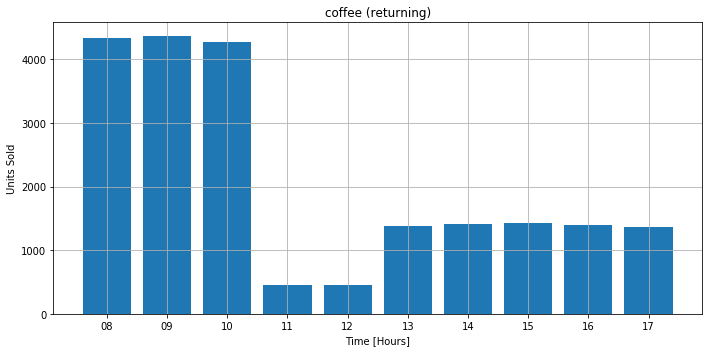

In [12]:
# Stats on food consumption probability of a returning customer
df_cons_returning = df_returning.groupby(df_returning[
    'CUSTOMER'])['FOOD'].count()/df_returning.groupby(df_returning[
    'CUSTOMER'])['TIME'].count()
print('Data on food consumption probability of a returning customer:\n%s\n' 
      % (df_cons_returning.describe()))

# Stats on food consumption probability of all customers
df_cons_all = df_customers.groupby(df_customers[
    'CUSTOMER'])['FOOD'].count()/df_customers.groupby(df_customers[
    'CUSTOMER'])['TIME'].count()
print('Data on food consumption probability of all customers:\n%s\n' 
      % (df_cons_all.describe()))

# Check if the difference is explained difference in hourly occurence ratio

# Food
time_constraint="%H"
df_ratiof_returning = df_returning.groupby(df_returning[
    'TIME'].dt.strftime(time_constraint))[
    'FOOD'].value_counts()/df_customers.groupby(df_customers[
    'TIME'].dt.strftime(time_constraint))[
    'FOOD'].value_counts()
print('Ratio of Food consumption of returning customers over one-time:\n%s\n' 
      % (df_ratiof_returning))
print('Ratio for consumption is approx. the same as the one for occurence.')      

# Drink
df_ratiod_returning = df_returning.groupby(df_returning[
    'TIME'].dt.strftime(time_constraint))[
    'DRINKS'].value_counts()/df_customers.groupby(df_customers[
    'TIME'].dt.strftime(time_constraint))[
    'DRINKS'].value_counts()
print('Ratio of Drinks consumption of returning customers over one-time:\n%s\n' 
      % (df_ratiod_returning))
print('The returning customers only consumes coffee between 8h and 10h.')  

# Coffee plot
df_customers_1D = df_returning[df_returning['DRINKS'] == "coffee"]
# Total drinks sold over time
subdf_hourlyconsumptionD = df_customers_1D.groupby(
    df_customers_1D['TIME'].dt.strftime("%H"))['DRINKS'].count()
# Plot drinks over time
plt.figure(figsize=(10, 5))
plt.bar(subdf_hourlyconsumptionD.index, subdf_hourlyconsumptionD)
plt.xlabel('Time [Hours]')
plt.ylabel('Units Sold')
plt.title("coffee (returning)")
plt.grid(True)
plt.tight_layout()
path = '../Plots/returning_coffee_Sold_Hourly.png'
plt.savefig(os.path.abspath( path ))

**Note :**  We conclude that the dataset could have been generated using the methodology given in part3.
  - We have a pool of 1000 returning customer.
  - The overall probability to obtain a returning customer is 20.852%.
  - The ratio do not increase or decrease over time in daily data. 
  - The probability to obtain a returning customer is:
      - 20% between 8h and 10h.
      - 10% between 11h and 12h.
      - 30% between 13H and 17h.
  - As the customers habits are not the same given the timestamp (see previously: 
      - The returning customers will not have the same consumption as one-timers.
      - Differences in consumption is almost entirely explained by changes in hourly occurence probability.
      - ONLY ONE HABIT IS DIFFERENT: Returning customers drink only coffee between 8h and 10h.
   